In [1]:
import sklearn
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[12,6])
import numpy as np

In [2]:
np.random.seed(1)
ufc_dataset = pd.read_csv("ufc_data.csv")
print(ufc_dataset.info())
ufc_dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(134), int64(24), object(1)
memory usage: 4.4+ MB
None


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.20000

In [3]:
# Red is 1, Blue is 0
ufc_dataset.loc[ufc_dataset["Winner"] == "Red", "Winner"] = 1
ufc_dataset.loc[ufc_dataset["Winner"] == "Blue", "Winner"] = 0

# drop the no_of_rounds because unknown in the beginning
ufc_dataset.drop(["no_of_rounds"], axis=1 ,inplace=True)

# drop all zero columns
ufc_dataset.drop(["B_draw"], axis=1 ,inplace=True)
ufc_dataset.drop(["R_draw"], axis=1 ,inplace=True)

ufc_dataset.head(5)

,Winner,title_bout,B_current_lose_streak,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,True,0.0,4.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,167.64,170.18,135.0,0.0,4.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0

In [4]:
# check dimension and null data
print(ufc_dataset.shape)

ufc_dataset.isna().any().any()

# check stas
ufc_dataset.describe()

(3592, 157)


,B_current_lose_streak,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
count,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,35

In [5]:
# normalize features for better performance (max-min normalization)

from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
min_max_scaler = MinMaxScaler()

# Fit_transform on the DataFrame and reassign
ufc_dataset = pd.DataFrame(min_max_scaler.fit_transform(ufc_dataset), 
                           columns=ufc_dataset.columns)

print(ufc_dataset.shape)
ufc_dataset.head(5)

(3592, 157)


,Winner,title_bout,B_current_lose_streak,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1.0,1.0,0.0,0.333333,0.187755,0.153846,0.002299,0.000000,0.230996,0.158462,0.029545,0.042553,0.175451,0.081752,0.160000,0.124590,0.114894,0.026667,0.000000,0.218729,0.146753,0.466000,0.050000,0.042105,0.020000,0.100000,0.184444,0.102609,0.2500,0.076923,0.104918,0.083333,0.009524,0.007143,0.141828,0.116000,0.006383,0.002381,0.118209,0.074603,0.066667,0.119298,0.096000,0.000000,0.000000,0.131671,0.090099,0.236000,0.000000,0.050000,0.040000,0.100000,0.133168,0.082759,0.108108,0.276222,0.0000,0.0,0.2,0.0,0.181818,0.090909,0.0,0.173913,0.260870,0.291667,0.086957,0.000000,0.2500,0.429412,0.420513,0.236111,0.211538,0.260870,0.202290,0.113253,0.122642,0.281061,0.200840,0.10000,0.092982,0.090244,0.085714,0.000000,0.339698,0.312057,0.466000,0.011111,0.176667,0.172727,0.458000,0.399078,0.341235,0.2500,0.142857,0.177333,0.214634,0.091463,0.100000,0.205682,0.186111,0.007692,0.005769,0.190250,0.131061,0.033333,0.149206,0.148780,0.000000,0.000000,0.217621,0.213

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets while maintaining the class distribution
train_set, test_set = train_test_split(ufc_dataset, test_size=0.2, random_state=30, stratify=ufc_dataset["Winner"])

# Display the dataset information
train_set.info()
test_set.info()

# X and Y for train and test set
train_X, train_y = train_set.drop("Winner", axis=1), train_set["Winner"]
test_X, test_y = test_set.drop("Winner", axis=1), test_set["Winner"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2873 entries, 1751 to 1888
Columns: 157 entries, Winner to R_Stance_Switch
dtypes: float64(157)
memory usage: 3.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 2158 to 3074
Columns: 157 entries, Winner to R_Stance_Switch
dtypes: float64(157)
memory usage: 887.5 KB


In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize and train the neural network classifier
neural_net = MLPClassifier()
neural_net.fit(train_X, train_y.values.ravel())

# Evaluate the model on the training data
predictions = neural_net.predict(train_X)
accuracy = accuracy_score(train_y, predictions)
f1 = f1_score(train_y, predictions, average='macro')

print(f"Mean of Predictions: {predictions.mean():.5f}")
print(f"Training Accuracy: {accuracy:.5f}")
print(f"Training F1 Score (macro): {f1:.5f}")

Mean of Predictions: 0.66446
Training Accuracy: 0.95510
Training F1 Score (macro): 0.94972


In [8]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores: 10 fold
scores = cross_val_score(neural_net, train_X, train_y.values.ravel(), scoring="f1_macro", cv=10)

# Display the results
print("Individual Cross-Validation F1 Macro Scores:", scores)
print("Average F1 Macro Score:", scores.mean())

Individual Cross-Validation F1 Macro Scores: [0.5656999  0.57868832 0.5703125  0.591524   0.62887931 0.56021818
 0.56001967 0.57477585 0.6034123  0.58722504]
Average F1 Macro Score: 0.5820755062245133


In [9]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

def stratFold(train_X_all, train_y_all, classifier, metric, average=None, fold=5):
    train_metric, val_metric, indices = [], [], []

    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        
        metric_list = []
        metric_list_train = []
        
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds, test_X_fold = train_X.iloc[train_index], train_X.iloc[test_index]
            train_y_folds, test_y_fold = train_y.iloc[train_index], train_y.iloc[test_index]
            
            classifier.fit(train_X_folds, train_y_folds.values.ravel())
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            
            if average:
                metric_val = metric(y_true=test_y_fold.values, y_pred=test_y_fold_pred, average=average)
                metric_train = metric(y_true=train_y_folds.values, y_pred=train_y_folds_pred, average=average)
            else:
                metric_val = metric(y_true=test_y_fold.values, y_pred=test_y_fold_pred)
                metric_train = metric(y_true=train_y_folds.values, y_pred=train_y_folds_pred)

            metric_list.append(metric_val)
            metric_list_train.append(metric_train)

        val_metric.append(np.mean(metric_list))
        train_metric.append(np.mean(metric_list_train))
        indices.append(m)

    return train_metric, val_metric, indices

In [10]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    
    plt.plot(indices, train_scores, "r-+", linewidth=2, label="train", zorder=5)
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation", zorder=5)
    
    plt.title(title, fontsize=14) 
    plt.legend(fontsize=10)
    
    plt.xlabel('Training Instances', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    

    plt.tick_params(axis='both', which='major', labelsize=12) 
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
    
    if inverse_x:
        plt.gca().invert_xaxis()
    
    plt.show()

In [11]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [12]:
def neural_net_summary(model):
    print("Number of Layers:", model.n_layers_)
    print("Number of Outputs:", model.n_outputs_)
    print("Hidden Layer Sizes:", model.hidden_layer_sizes)
    print("Alpha (Regularization strength):", model.alpha)
    print("Number of Iterations:", model.n_iter_)
    print("Current Loss:", model.loss_)

    for i, (coef, intercept) in enumerate(zip(model.coefs_, model.intercepts_)):
        print(f"Layer {i + 1} - Number of Neurons:", coef.shape[1])
        print(f"Layer {i + 1} - Number of Weights:", coef.shape[0])

neural_net_summary(neural_net)


Number of Layers: 3
Number of Outputs: 1
Hidden Layer Sizes: (100,)
Alpha (Regularization strength): 0.0001
Number of Iterations: 200
Current Loss: 0.2013125262272969
Layer 1 - Number of Neurons: 100
Layer 1 - Number of Weights: 156
Layer 2 - Number of Neurons: 1
Layer 2 - Number of Weights: 100


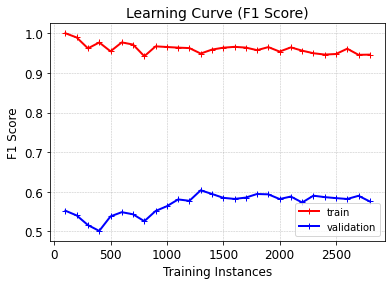

In [13]:
from sklearn.metrics import f1_score

f1_scores = stratFold(train_X, train_y, neural_net, f1_score, average="macro")

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve (F1 Score)")

In [14]:
# Grid Search on Parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50), (75), (100)],
    'alpha': [0.01, 0.001, 0.0001],
    'max_iter': [100, 200, 300],
    'beta_1': [0.75, 0.9, 0.99]
}

search_f1 = GridSearchCV(MLPClassifier(), param_grid, cv=10, 
                      scoring='f1_macro', n_jobs=-1)

search_f1.fit(train_X, train_y.values.ravel())

# Display best parameters and score
print("Best Parameters:", search_f1.best_params_)
print("Best F1 Score:", search_f1.best_score_)

results = pd.DataFrame(search_f1.cv_results_)

# Display the F1 scores for each combination of parameters
for index, row in results.iterrows():
    print("Hidden_Layer_Size:", row['param_hidden_layer_sizes'])
    print("Alpha:", row['param_alpha'])
    print("Max Iterations:", row['param_max_iter'])
    print("Beta 1:", row['param_beta_1'])
    print("Mean F1 Score:", row['mean_test_score'])
    print("Standard Deviation of F1 Score:", row['std_test_score'])
    print("--------------------------------------------------------")

# Visualizing the learning curve for the best model (if you still want to do this, uncomment)
# f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, f1_score, average='macro')
# plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], "Learning Curve (F1 Score)")


Best Parameters: {'alpha': 0.001, 'beta_1': 0.75, 'hidden_layer_sizes': 100, 'max_iter': 100}
Best F1 Score: 0.609510160120222
Hidden_Layer_Size: 50
Alpha: 0.01
Max Iterations: 100
Beta 1: 0.75
Mean F1 Score: 0.5944457810356667
Standard Deviation of F1 Score: 0.027204729170016782
--------------------------------------------------------
Hidden_Layer_Size: 50
Alpha: 0.01
Max Iterations: 200
Beta 1: 0.75
Mean F1 Score: 0.5963210289064178
Standard Deviation of F1 Score: 0.01988865757514161
--------------------------------------------------------
Hidden_Layer_Size: 50
Alpha: 0.01
Max Iterations: 300
Beta 1: 0.75
Mean F1 Score: 0.5962708199082242
Standard Deviation of F1 Score: 0.02301952226364389
--------------------------------------------------------
Hidden_Layer_Size: 75
Alpha: 0.01
Max Iterations: 100
Beta 1: 0.75
Mean F1 Score: 0.5864816434685112
Standard Deviation of F1 Score: 0.023991800037723828
--------------------------------------------------------
Hidden_Layer_Size: 75
Alpha: 0.

In [15]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=False):
    
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train", zorder=5)
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation", zorder=5)
    
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10)
    
    plt.ylabel('F1 Score', fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
    
    plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.8min finished


[0.94511061 0.93763098 0.93423691 0.92427708 0.91826303 0.91613572
 0.90274172 0.89906003 0.89225995 0.88296631 0.87970127 0.87200139
 0.86745503 0.86114506 0.84936361] [0.57792885 0.5814456  0.59493584 0.58672335 0.58504389 0.58948547
 0.58757202 0.58339165 0.59298815 0.58817479 0.59076034 0.59184144
 0.58594939 0.5945694  0.58910416] [1.00000e-05 1.42950e-02 2.85800e-02 4.28650e-02 5.71500e-02 7.14350e-02
 8.57200e-02 1.00005e-01 1.14290e-01 1.28575e-01 1.42860e-01 1.57145e-01
 1.71430e-01 1.85715e-01 2.00000e-01]


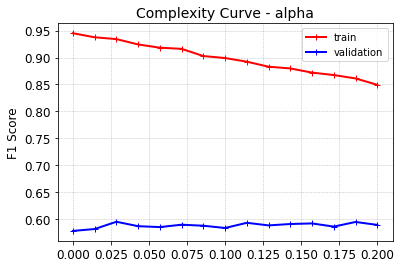

In [23]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(0.00001, 0.2, 15)

train_scores, test_scores = validation_curve(
    neural_net, train_X, train_y.values.ravel(), param_name="alpha", 
    param_range=param_range, n_jobs=-1,
    scoring='f1_macro', verbose=1, cv=10
)

print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)

plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='Complexity Curve - alpha')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.5min finished


[0.64434742 0.69819309 0.73520318 0.77642987 0.78221247 0.81506216
 0.8238837  0.8384521  0.8621211  0.86898059 0.88238291 0.89634382
 0.90352306 0.9116372  0.92310052 0.92858308 0.93557589 0.93817712
 0.93968616 0.94817267] [0.5837373  0.5901485  0.58739312 0.59503377 0.58744245 0.58707562
 0.58937027 0.585252   0.58964166 0.58201058 0.59372782 0.58673255
 0.58449914 0.58289449 0.5906669  0.59882037 0.57564884 0.59481471
 0.58242064 0.58557013] [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]


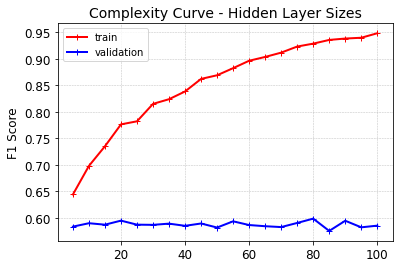

In [17]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(5, 100, 20).astype(int)

train_scores, test_scores = validation_curve(
    neural_net, train_X, train_y.values.ravel(), param_name="hidden_layer_sizes", 
    param_range=param_range, n_jobs=-1,
    scoring='f1_macro', verbose=1, cv=10
)

print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)

plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='Complexity Curve - Hidden Layer Sizes')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished


[0.93442516 0.93722345 0.93590108 0.93940025 0.93450578 0.93921621
 0.94717398 0.94717306 0.95150304 0.91959203] [0.59262679 0.57542896 0.57998858 0.58263966 0.57328371 0.56995885
 0.60164632 0.58302135 0.59088498 0.59427085] [0.5        0.55444444 0.60888889 0.66333333 0.71777778 0.77222222
 0.82666667 0.88111111 0.93555556 0.99      ]


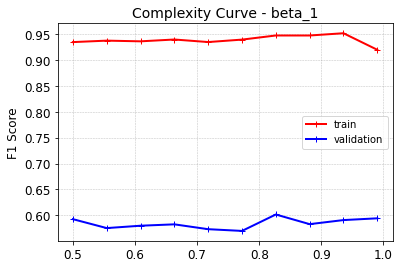

In [18]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(0.5, 0.99, 10)

train_scores, test_scores = validation_curve(
    neural_net, train_X, train_y.values.ravel(), param_name="beta_1", 
    param_range=param_range, n_jobs=-1,
    scoring='f1_macro', verbose=1, cv=10
)

print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)

plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='Complexity Curve - beta_1')

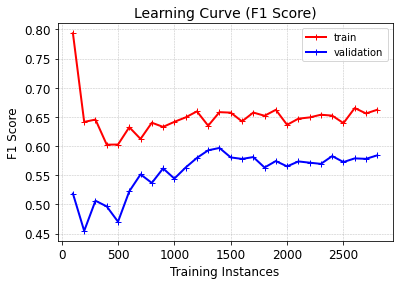

In [19]:
grid_net = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.75,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

f1_scores = stratFold(train_X, train_y, grid_net, f1_score, 
                      average='macro')

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve (F1 Score)")

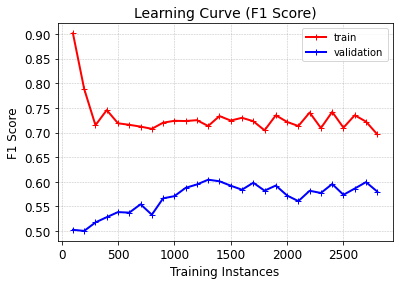

In [20]:
grid_net = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.75,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=30, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

f1_scores = stratFold(train_X, train_y, grid_net, f1_score, 
                      average='macro')

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve (F1 Score)")

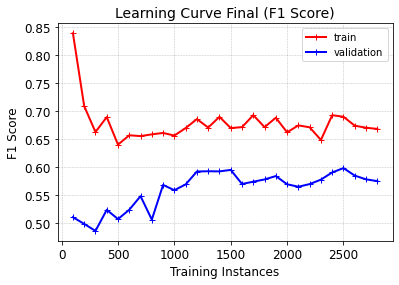

In [21]:
grid_net = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.75,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=15, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

f1_scores = stratFold(train_X, train_y, grid_net, f1_score, 
                      average='macro')

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve Final (F1 Score)")

In [22]:
from sklearn.metrics import classification_report, confusion_matrix


# Train the model on the training data
grid_net.fit(train_X, train_y)

# Predict on the test data
test_predictions = grid_net.predict(test_X)

# Print the comprehensive classification report
print(classification_report(test_y, test_predictions, digits=5))

# Print the confusion matrix for a detailed breakdown of predictions
print(confusion_matrix(test_y, test_predictions))

              precision    recall  f1-score   support

         0.0    0.54795   0.32922   0.41131       243
         1.0    0.71553   0.86134   0.78170       476

    accuracy                        0.68150       719
   macro avg    0.63174   0.59528   0.59650       719
weighted avg    0.65889   0.68150   0.65652       719

[[ 80 163]
 [ 66 410]]
